In [1]:
# 1. Import pandas
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import sys
import seaborn as sns


sys.path.append("/Users/tylersong/Desktop/school/ML/ML-Final-Project")
from utils import grid_evaluate, preprocess_credit_card_data



# 2. Load the saved CSVs
X_train = pd.read_csv('../X_train.csv')
X_test = pd.read_csv('../X_test.csv')
y_train = pd.read_csv('../y_train.csv')
y_test = pd.read_csv('../y_test.csv')

# 4. Verify shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(747, 28)
(250, 28)
(747, 1)
(250, 1)


In [2]:
# One iteration testing
# svm_clf = SVC(
#     kernel='linear',       # radial basis function kernel
#     C=1.0,              # regularization parameter; try grid‐search to tune
#     gamma='scale',      # 'scale' is 1 / (n_features * X.var())
#     probability=True,   # enable .predict_proba() for ROC/AUC
#     random_state=42
# )
# svm_clf.fit(X_train, y_train)

# # 3) Make predictions
# y_pred    = svm_clf.predict(X_test)
# y_proba   = svm_clf.predict_proba(X_test)[:,1]

# grid search using GridSearchCV
svm = SVC(probability=True, random_state=42)

# param_grid = {
#     'C':     [0.1, 1, 10, 100],
#     'gamma': [0.01, 0.1, 1, 10]
# }


# grid = GridSearchCV(
#     estimator=svm,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=5,
#     n_jobs=-1,
#     verbose=2
# )



# grid.fit(X_train, y_train)

# print("Best CV ROC-AUC:", grid.best_score_)
# print("Best params:   ", grid.best_params_)

# # Evaluate on test
# best_svm = grid.best_estimator_
# y_pred = best_svm.predict_proba(X_test)[:,1]
# print("Test ROC-AUC:", roc_auc_score(y_test, y_pred))

param_grid = {
    'feature_method': [None, 'polynomial', 'pca', 'rbf'],
    'degree':         [2, 3],
    'n_components':   [5, 10],
    'gamma':          [0.1, 0.5],
    'C':              [0.1, 1.0, 10.0],
}

results = grid_evaluate(
    estimator  = svm,
    param_grid = param_grid,
    X_train    = X_train,
    X_test     = X_test,
    y_train    = y_train,
    y_test     = y_test
)

# best by F1
best = results.sort_values('f1_score', ascending=False)
print(best)
print(best.iloc[0])

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

   feature_method  degree  n_components  gamma  accuracy  precision    recall  \
69     polynomial       2            10    0.1     0.776   0.588235  0.322581   
70     polynomial       2             5    0.5     0.776   0.588235  0.322581   
71     polynomial       2            10    0.5     0.776   0.588235  0.322581   
68     polynomial       2             5    0.1     0.776   0.588235  0.322581   
82           None       3             5    0.5     0.764   0.538462  0.338710   
..            ...     ...           ...    ...       ...        ...       ...   
22     polynomial       3             5    0.5     0.752   0.000000  0.000000   
21     polynomial       3            10    0.1     0.752   0.000000  0.000000   
20     polynomial       3             5    0.1     0.752   0.000000  0.000000   
19           None       3            10    0.5     0.752   0.000000  0.000000   
0            None       2             5    0.1     0.752   0.000000  0.000000   

    f1_score     C  
69  0.

In [3]:
results.to_csv('logistic_regression_results.csv', index=False)
print("Saved results to logistic_regression_results.csv")

Saved results to logistic_regression_results.csv


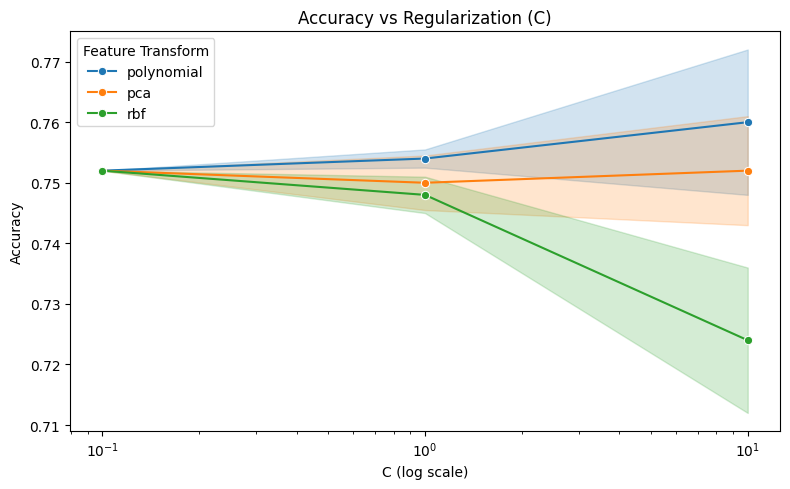

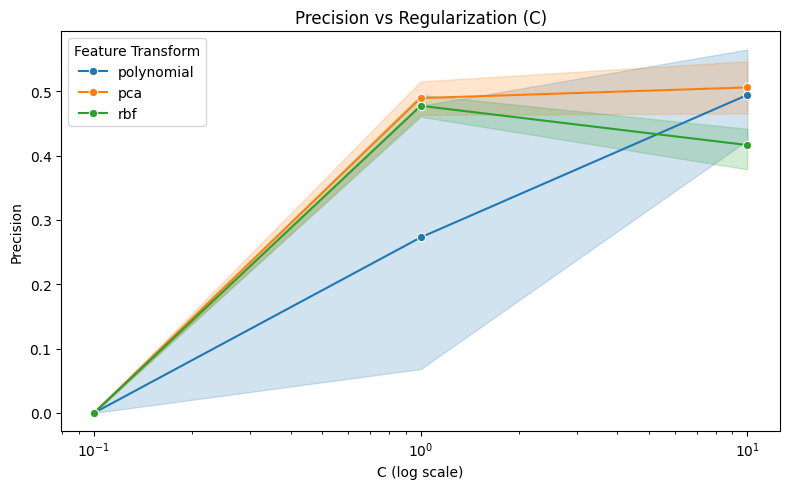

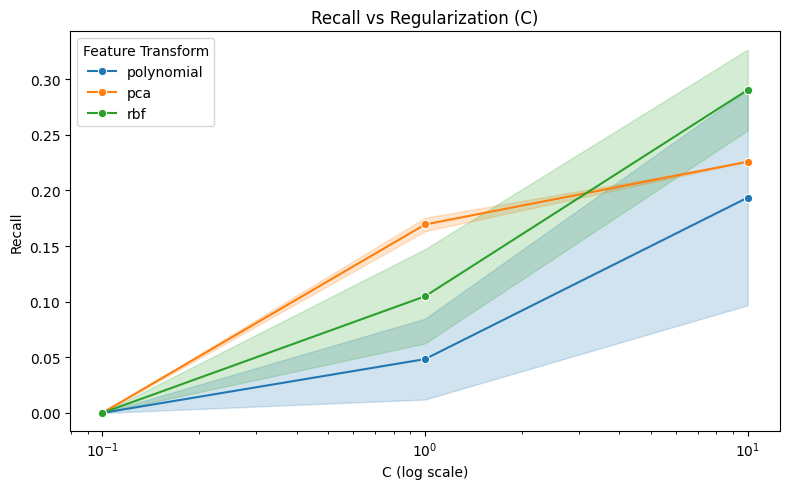

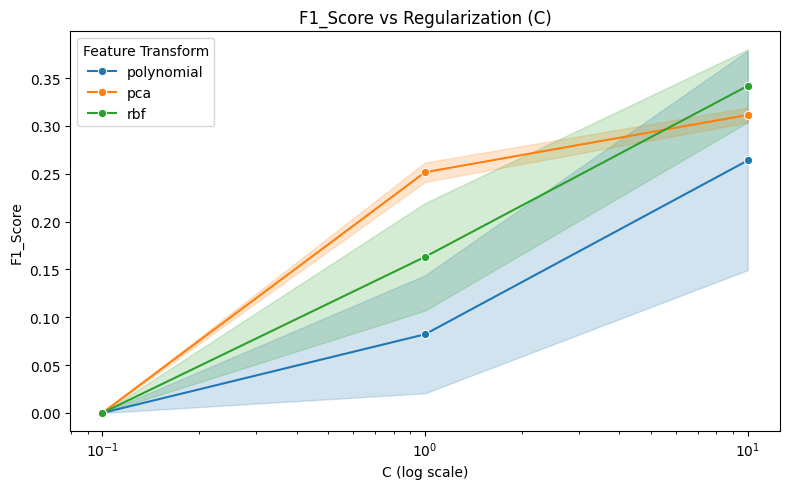

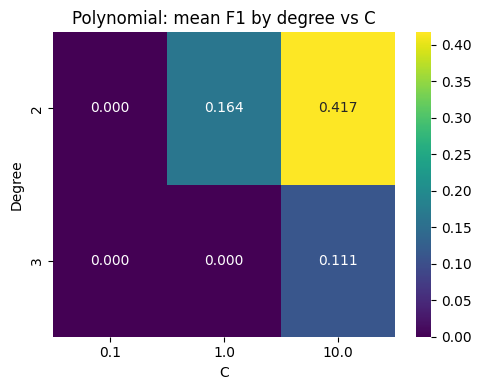

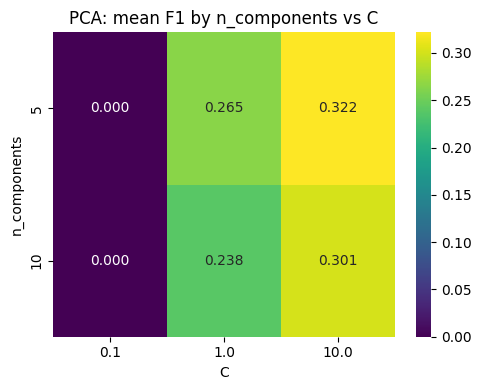

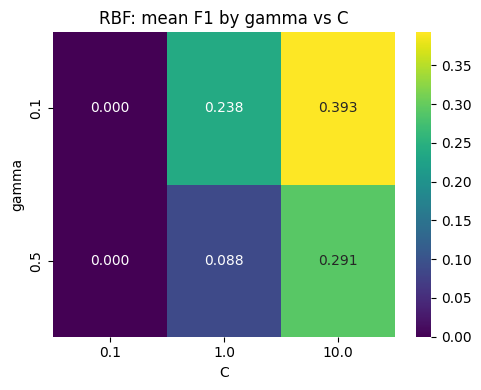

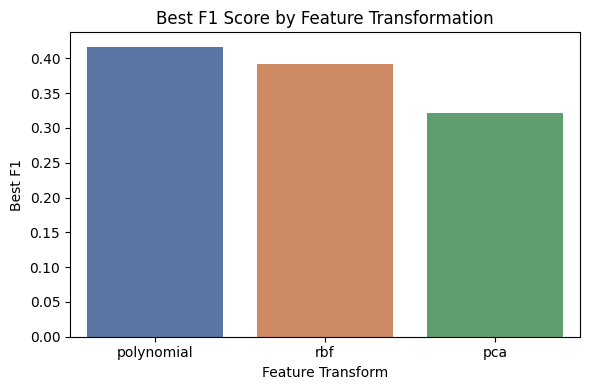

In [4]:


# … assume you’ve already built `results` … #

# 1) Line‐plots of each metric vs C (unchanged)
metrics = ['accuracy','precision','recall','f1_score']
for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.lineplot(
        data   = results,
        x      = 'C',
        y      = metric,
        hue    = 'feature_method',
        marker = 'o'
    )
    plt.xscale('log')
    plt.title(f'{metric.title()} vs Regularization (C)')
    plt.ylabel(metric.title())
    plt.xlabel('C (log scale)')
    plt.legend(title='Feature Transform')
    plt.tight_layout()
    plt.show()


# 2) Heatmap for Polynomial: mean F1 by degree vs C
poly = results[results['feature_method']=='polynomial']
if not poly.empty:
    pivot_poly = poly.pivot_table(
        index='degree',
        columns='C',
        values='f1_score',
        aggfunc='mean'
    )
    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_poly, annot=True, fmt='.3f', cmap='viridis')
    plt.title('Polynomial: mean F1 by degree vs C')
    plt.ylabel('Degree')
    plt.xlabel('C')
    plt.tight_layout()
    plt.show()


# 3) Heatmap for PCA: mean F1 by n_components vs C
pca = results[results['feature_method']=='pca']
if not pca.empty:
    pivot_pca = pca.pivot_table(
        index='n_components',
        columns='C',
        values='f1_score',
        aggfunc='mean'
    )
    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_pca, annot=True, fmt='.3f', cmap='viridis')
    plt.title('PCA: mean F1 by n_components vs C')
    plt.ylabel('n_components')
    plt.xlabel('C')
    plt.tight_layout()
    plt.show()


# 4) Heatmap for RBF: mean F1 by gamma vs C
rbf = results[results['feature_method']=='rbf']
if not rbf.empty:
    pivot_rbf = rbf.pivot_table(
        index='gamma',
        columns='C',
        values='f1_score',
        aggfunc='mean'
    )
    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_rbf, annot=True, fmt='.3f', cmap='viridis')
    plt.title('RBF: mean F1 by gamma vs C')
    plt.ylabel('gamma')
    plt.xlabel('C')
    plt.tight_layout()
    plt.show()



best_per = (
    results
    .groupby('feature_method', as_index=False)
    ['f1_score']
    .max()
    .sort_values('f1_score', ascending=False)
)

plt.figure(figsize=(6,4))
ax = sns.barplot(
    data    = best_per,
    x       = 'feature_method',
    y       = 'f1_score',
    hue     = 'feature_method',  
    dodge   = False,              
    palette = 'deep'
)
legend = ax.get_legend()
if legend is not None:
    legend.remove()


plt.title('Best F1 Score by Feature Transformation')
plt.ylabel('Best F1')
plt.xlabel('Feature Transform')
plt.tight_layout()
plt.show()


In [5]:
# 1) Pull results into a DataFrame
results = pd.DataFrame(grid.cv_results_)

# 2) Pivot so rows=gamma, cols=C, values=mean score
pivot = results.pivot(
    index='param_gamma',
    columns='param_C',
    values='mean_test_score'
)

# 3) Plot it
plt.figure()
plt.imshow(pivot, aspect='auto')            # image of the 2D array
plt.colorbar(label='Mean CV Accuracy')      # side bar

# 4) Label ticks
plt.xticks(np.arange(len(pivot.columns)), pivot.columns)
plt.yticks(np.arange(len(pivot.index)),      pivot.index)

plt.xlabel('C')
plt.ylabel('gamma')
plt.title('GridSearchCV Accuracy Heatmap')
plt.tight_layout()
plt.show()

NameError: name 'grid' is not defined

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      5840
           1       0.68      0.32      0.43      1643

    accuracy                           0.82      7483
   macro avg       0.76      0.64      0.66      7483
weighted avg       0.80      0.82      0.79      7483

Confusion Matrix:
 [[5593  247]
 [1122  521]]
SVM ROC AUC: 0.714


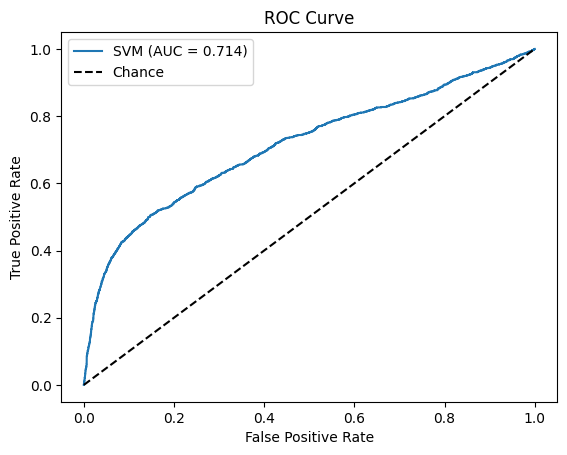

In [ ]:
# 4) Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC / AUC
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
print(f"SVM ROC AUC: {auc:.3f}")

plt.figure()
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], 'k--', label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()